# Simulation de variable aléatoire 

## Méthode basée sur l'inverse généralisée

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [66]:
Lambda = 2
f = lambda x : Lambda * np.exp(-Lambda * x)
F = lambda x : 1 - np.exp(-Lambda * x)
invF = lambda u : -(1/Lambda)* np.log(1 - u)

nbEchan =  10000

def Inverse_generalisee(invF, nbEchan):
    '''Méthode de l'inverse généralisée
    
    Returns: Echantillons (array de taille nbEchan)
    '''
    U = uniform.rvs(loc = 0, scale = 1, size = nbEchan)
    X = invF(U)
    return X

X = Inverse_generalisee(invF, nbEchan)


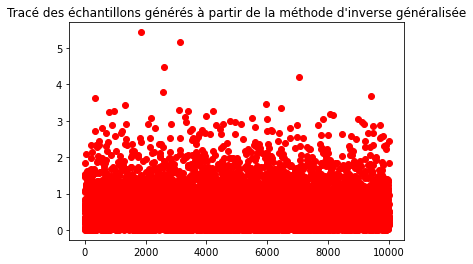

In [64]:
plt.plot(X, 'ro')
plt.title("Tracé des échantillons générés à partir de la méthode d'inverse généralisée")
plt.show()

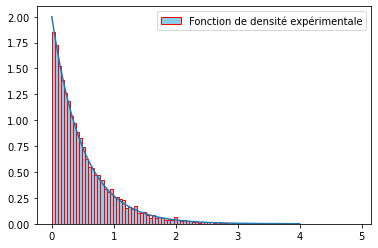

In [67]:
plt.hist(X, bins = 100, density = True, color = 'skyblue', edgecolor = "red", label = "Fonction de densité expérimentale")
x = np.linspace(0, 4, nbEchan)
f = f(x)
plt.plot(x, f)
plt.legend()
plt.show()

Principal inconvénient de cette méthode :  
Il faut pouvoir écrire l'inverse de la fonction de répartition ! Et ce n'est pas toujours possible. 

## Méthode Accept Reject


In [53]:
from scipy.stats import norm, cauchy

In [54]:
nbEchan = 10000
M = 5
X = np.zeros(shape = nbEchan)

In [60]:
f = lambda x : norm.pdf(x = x, loc = 0, scale = 1) #scale = écart type

for i in range(nbEchan):
    u = uniform.rvs(loc = 0, scale = 1, size = 1)
    x = cauchy.rvs(loc = 0, scale = 1, size = 1)
    
    while (f(x) / (M * cauchy.pdf(x= x, loc = 0, scale = 1))) < u:
        u = uniform.rvs(loc = 0, scale = 1, size = 1)
        x = cauchy.rvs(loc = 0, scale = 1, size = 1)
    X[i] = x

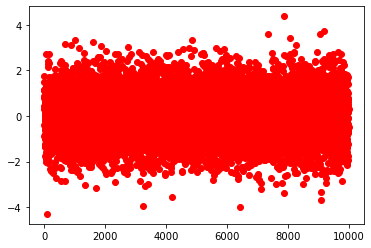

In [61]:
plt.plot(X, 'ro')
plt.show()

Faire varier M pour voir comment l'algorithme réagit. D'autre part, l'algorithme fonctionne quelques fois 'pour rien', jeter un oeil à la boucle while.. 

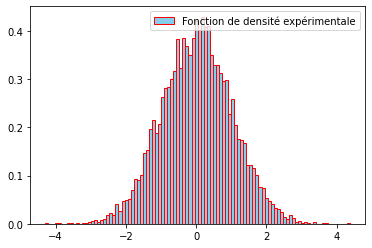

In [62]:
plt.hist(X, bins = 100, density = True, color = 'skyblue', edgecolor = "red", label = "Fonction de densité expérimentale")

plt.legend()
plt.show()